In [33]:
setprecision(3000);

In [34]:
function accuracy(t)
    e = ep*exp(BigFloat(2.3025851)*(BigFloat(0.046)*t-BigFloat(15)))
    ac = (0.29803-log10(e))/0.30103;
    return max(round(Int,ac),64);
end

accuracy (generic function with 1 method)

In [35]:
function order()
    M=100;
    return M+1;
end

order (generic function with 1 method)

In [36]:
function Ep(t)
    return ep*exp(BigFloat(2.3025851)*(BigFloat(0.046)*t-BigFloat(10)))
end

Ep (generic function with 1 method)

In [37]:
function steps(Dfm,Co)
    h = Co*abs(Dfm)^(BigFloat(-1)/BigFloat(order()-1))
    return min(h,BigFloat(2))
end

steps (generic function with 1 method)

In [38]:
function goonm(mor)
    sgo = BigFloat(1)
    for i in 1:mor
        sgo = sgo*BigFloat(i)
    end
    return (sgo)^(BigFloat(1)/BigFloat(mor))
end 

goonm (generic function with 1 method)

In [39]:
function goon(mor,ep)
    sgo = BigFloat(1)
    for i in 1:mor
        sgo = sgo*BigFloat(i)
    end
    return (ep*sgo)^(BigFloat(1)/BigFloat(mor))
end 

goon (generic function with 1 method)

In [40]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [41]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [42]:
function multi(hstep)
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*hstep/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [43]:
fdot1(x,y,z) = @. x*y*z
fdot2(x,y) = @. x*y
function Sumxyz1(x,y,Cki)
    return sum(fdot1(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function Sumxyz2(x,y,Cki)
    return sum(fdot2(Cki,fdot2(reverse!(x[1:end]),x[1:end]) .- fdot2(reverse!(y[1:end]),y[1:end])))
end 

Sumxyz2 (generic function with 1 method)

In [44]:
function Talor(x,y,Cki,Co)
    for k in 1:order()-2
        x[k+2] = -x[k] - BigFloat(2)*Sumxyz1(x[1:k],y[1:k],Cki[k,1:k])
        y[k+2] = -y[k] - Sumxyz2(x[1:k],y[1:k],Cki[k,1:k]) 
    end
    return x,y,min(steps(x[end],Co),steps(y[end],Co))
end

Talor (generic function with 1 method)

In [45]:
function Iteration(x,y,Cki,Tin,Tinf)
    stl = 0;
    for st in 1:Times
        
        Co = Mo*Ep(Tin)^(BigFloat(1)/BigFloat(order()))
        setprecision(accuracy(Tin))
        
        x,y,hstep = Talor(x,y,Cki,Co)
        
        if Tin + hstep < Tinf
            
            Dmulti = multi(hstep);
            x[1] = sum(x[1:end].*Dmulti[1:end])
            y[1] = sum(y[1:end].*Dmulti[1:end])
            x[2] = sum(x[2:end].*Dmulti[1:end-1])
            y[2] = sum(y[2:end].*Dmulti[1:end-1])
            Lorenz[st,:] = [x[1],y[1]] 
            Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
            
            Tin = Tin + hstep
            if mod(st,100) == 0
            #println(st,")","Time=",convert.(Float16,Tin),": ",Lorenzf[st,:]," (Ep: ",convert(Float16,log10(abs(Ep(Tin)))),") (Mp: ",accuracy(Tin),")")
            println(convert.(Float16,Tin))
            end
        else
            hstep = Tinf - Tin
            Dmulti = multi(hstep);
            x[1] = sum(x[1:end].*Dmulti[1:end])
            y[1] = sum(y[1:end].*Dmulti[1:end])
            x[2] = sum(x[2:end].*Dmulti[1:end-1])
            y[2] = sum(y[2:end].*Dmulti[1:end-1])
            Lorenz[st,:] = [x[1],y[1]] 
            Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
            Tin = Tinf
            println(st,")","Time=",convert.(Float16,Tin),": ",Lorenzf[st,:]," (Ep: ",convert(Float16,log10(abs(Ep(Tin)))),") (Mp: ",accuracy(Tin),")")
            #println(convert.(Float16,Tin))
            stl = st
            break;
        end
        
    end
    
    return Lorenz,stl
    
end

Iteration (generic function with 1 method)

In [46]:
Times = 1000000;      
Tin = BigFloat(0);
Tinf = BigFloat(2000);

#ep = BigFloat(10)^BigFloat(-75);
ep = BigFloat(10)^(-8-0.046*Tinf)
Mo = goonm(order())

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
Lorenz = Array{BigFloat}(undef,Times,2);
Lorenzf = Array{Float32}(undef,Times,2);
Dmulti = Array{BigFloat}(undef,1,order());
Cki = Array{BigFloat}(undef,order()-1,order()-1);
HH = Array{BigFloat}(undef,Times,2);

x[1] = BigFloat(14)/BigFloat(25); 
y[1] = BigFloat(0); 
x[2] = BigFloat(0); 
y[2] = BigFloat(0); 

Cki = DJCh();
println("ep0: ",convert(Float16,log10(abs(ep))))

ep0: -100.0


In [47]:
HH,st = Iteration(x,y,Cki,Tin,Tinf);

28.5
57.0
88.4
118.75
150.9
183.8
217.5
254.1
291.5
330.2
370.2
412.5
454.8
499.5
547.5
598.0
652.0
709.5
769.5
833.5
902.0
974.5
1.054e3
1.141e3
1.238e3
1.345e3
1.463e3
1.599e3
1.762e3
1.951e3
2.0e3


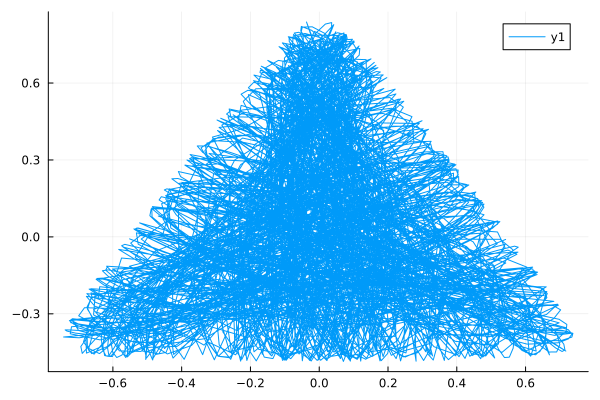

In [48]:
using Plots; 
plot(HH[1:st,1],HH[1:st,2])